<a href="https://colab.research.google.com/github/anggisotomani/Sentiment-Analysis/blob/main/Ride_Hailing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Packages and Import Library**

In [1]:
# Install packages
!pip install sastrawi
!pip install gensim
!pip install nltk
!pip install wordcloud
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import datetime as dt
import re
import string
import ipywidgets as widgets
from io import StringIO
from IPython.display import display
from sklearn.metrics import accuracy_score

# NLP libraries
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from gensim.models import Word2Vec
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy import sparse

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading Dataset**

In [2]:
# Download dataset dari GitHub
!wget -O dataset.csv "https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Dataset_OjekOnline_Apps%20(1).csv"

--2025-05-30 09:41:34--  https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Dataset_OjekOnline_Apps%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19690190 (19M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  18.78M  --.-KB/s    in 0.1s    

2025-05-30 09:41:35 (136 MB/s) - ‘dataset.csv’ saved [19690190/19690190]



In [3]:
df = pd.read_csv('/content/dataset.csv')
df

userName  score                   at  \
0                  Pengguna Google      5  2024-12-20 12:57:42   
1                  Pengguna Google      1  2024-12-20 12:55:01   
2                  Pengguna Google      5  2024-12-20 12:45:41   
3                  Pengguna Google      1  2024-12-20 12:42:27   
4                  Pengguna Google      1  2024-12-20 12:35:55   
...                            ...    ...                  ...   
199995             sutrisno trisno      5  2024-07-15 07:47:19   
199996              Novita Lalenoh      1  2024-07-15 07:43:01   
199997               herleni pohan      5  2024-07-15 07:39:59   
199998                   Zuhri Oke      5  2024-07-15 07:32:30   
199999  Kurnia Agung Maulana Yamin      1  2024-07-15 07:31:54   

                                                  content  appName  
0                                                   keren  inDrive  
1                       Aplikasi jelek buruk banget...👎👎👎  inDrive  
2                                                    good  inDrive  
3       Aplikasi penjahat , Maling uang driver , sy se...  inDrive  
4       Hey dev, udah mah aplikasi tidak kompatibel di...  inDrive  
...                                                   ...      ...  
199995                                                 ok    Maxim  
199996  Maxim sekarang bisa tiba2 mark up harga yah :(...    Maxim  
199997                                              mantp    Maxim  
199998               Cepat dan Ramai, Driver maxim Handal    Maxim  
199999           Aplikasi tolol, minta OTP aja susah bodo    Maxim  

[200000 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userName  200000 non-null  object
 1   score     200000 non-null  int64 
 2   at        200000 non-null  object
 3   content   199998 non-null  object
 4   appName   200000 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.6+ MB


# **Preprocessing Text**

In [5]:
clean_df = df.dropna()

In [6]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
clean_df.drop(['userName', 'score', 'at'], axis=1, inplace=True)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  199998 non-null  object
 1   appName  199998 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [9]:
#Cleaning
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[^\x00-\x7F]+', '', text) # menghapus karakter non-ASCII (termasuk emoji)
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

#Casefolding
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

#Normalization
# Menghapus kata-kata Slang
slangwords = {
    "@": "di",
    "abg": "abang",
    "abis": "habis",
    "acc": "setuju",
    "ad": "ada",
    "adain": "adakan",
    "aja": "saja",
    "ajah": "saja",
    "aj": "saja",
    "ancur": "hancur",
    "alhasil": "hasilnya",
    "alhamdulilah": "alhamdulillah",
    "alesan": "alasan",
    "ama": "sama",
    "aamiin": "amin",
    "anj": "anjing",
    "ajg": "anjing",
    "ajh": "saja",
    "anter": "antar",
    "anyep": "tidak menarik",
    "apl": "aplikasi",
    "aplikator": "pengguna",
    "apk": "aplikasi",
    "apknya": "aplikasinya",
    "app": "aplikasi",
    "apps": "aplikasi",
    "asu": "anjing",
    "bagu": "bagus",
    "bro": "kawan",
    "baikk": "baik",
    "bagusss": "bagus",
    "baguss": "bagus",
    "bagussssssssss": "bagus",
    "bales": "balas",
    "bang": "abang",
    "bangat": "amat",
    "bener": "benar",
    "bnget": "sekali",
    "bgtt": "sekali",
    "bangett": "sekali",
    "batalin": "sekali",
    "bawa": "bawah",
    "bikin": "membuat",
    "bgs": "bagus",
    "bgus": "bagus",
    "byr": "bayar",
    "byar": "bayar",
    "bnyk": "banyak",
    "bego": "bodoh",
    "bgt": "sekali",
    "belom": "belum",
    "benerin": "perbaiki",
    "best": "bagus",
    "blm": "belum",
    "bln": "bulan",
    "blom": "belum",
    "blum": "belum",
    "bnyak": "banyak",
    "bngt": "sekali",
    "bodo": "bodoh",
    "bobrok": "berantakan",
    "bodoh": "bodoh",
    "boleh": "boleh",
    "bs": "bisa",
    "bsa": "bisa",
    "btk": "bentuk",
    "bruk": "buruk",
    "buru": "buruk",
    "byk": "banyak",
    "byr": "bayar",
    "cape": "lelah",
    "capek": "lelah",
    "cencel": "batal",
    "costomer": "customer",
    "castamer": "customer",
    "costumer": "customer",
    "cansel": "batal",
    "cepet": "cepat",
    "cmn": "cuma",
    "cpt": "cepat",
    "cs": "teman",
    "cuan": "untung",
    "cust": "customer",
    "cuman": "cuma",
    "dapet": "dapat",
    "dapetnya": "dapatnya",
    "dtang": "datang",
    "dtg": "datang",
    "dateng": "datang",
    "dev": "developer",
    "dicancel": "dibatalkan",
    "dibatalin": "dibatalkan",
    "dipake": "dipakai",
    "diskon": "diskon",
    "dll": "dan lain lain",
    "dlm": "dalam",
    "dlu": "dulu",
    "dn": "dan",
    "deket": "dekat",
    "doang": "saja",
    "dpat": "dapat",
    "dpt": "dapat",
    "dpet": "dapat",
    "drive": "driver",
    "drever": "driver",
    "dtg": "datang",
    "emang": "memang",
    "emg": "memang",
    "eror": "error",
    "ngga": "tidak",
    "nggak": "tidak",
    "gak": "tidak",
    "g": "tidak",
    "ga": "tidak",
    "gw": "aku",
    "gabisa": "tidak bisa",
    "gacor": "hebat",
    "gamau": "tidak mau",
    "gara": "karena",
    "garis": "garis",
    "gatau": "tidak tau",
    "gede": "besar",
    "gg": "bagus",
    "genting": "genting",
    "gmn": "gimana",
    "gajelas": "tidak jelas",
    "gimna": "gimana",
    "gk": "tidak",
    "gausah": "tidak usah",
    "glitch": "kesalahan",
    "gmna": "gimana",
    "gojeg": "gojek",
    "goodjob": "kerja bagus",
    "grab": "grab",
    "grap": "grab",
    "great": "hebat",
    "gercep": "gerakan cepat",
    "greb": "grab",
    "gue": "saya",
    "gua": "aku",
    "gx": "tidak",
    "halo": "halo",
    "hallo": "halo",
    "harus": "harus",
    "hebat": "hebat",
    "hrs": "harus",
    "hrus": "harus",
    "ijo": "hijau",
    "indri": "indrive",
    "inddriver": "indrive",
    "indriver": "indrive",
    "indrever": "indrive",
    "instal": "install",
    "jln": "jalan",
    "jangan": "jangan",
    "jelasss": "jelas",
    "jdi": "jadi",
    "jd": "jadi",
    "jelek": "buruk",
    "jg": "juga",
    "jga": "juga",
    "jgn": "jangan",
    "jgnn": "jangan",
    "jls": "jelas",
    "josss": "jos",
    "juga": "juga",
    "jln": "jalan",
    "k": "ke",
    "ka": "abang",
    "kk": "kakak",
    "kak": "kakak",
    "kagak": "tidak",
    "kaka": "kakak",
    "kalo": "kalau",
    "kalo": "kalau",
    "kalw": "kalau",
    "karna": "karena",
    "karena": "karena",
    "kasih": "kasih",
    "kaga": "tidak",
    "kasi": "kasih",
    "kepotong": "terpotong",
    "kerenn": "keren",
    "kek": "seperti",
    "kemaren": "kemarin",
    "khl": "khusus",
    "kl": "kalau",
    "klau": "kalau",
    "klw": "kalau",
    "komen": "komentar",
    "knpa": "kenapa",
    "knp": "kenapa",
    "knapa": "kenapa",
    "kost": "kos",
    "kost2an": "kos-kosan",
    "ko": "kok",
    "kok": "kok",
    "koq": "kenapa",
    "ksh": "kasih",
    "kasian": "kasihan",
    "krn": "karena",
    "klo": "kalau",
    "krna": "karena",
    "ksih": "kasih",
    "kya": "kaya",
    "lah": "lah",
    "lahh": "lah",
    "lbih": "lebih",
    "lbh": "lebih",
    "lelet": "lambat",
    "liat": "lihat",
    "lgsg": "langsung",
    "lngsung": "langsung",
    "lgi": "lagi",
    "lh": "lah",
    "luck": "beruntung",
    "lu": "kau",
    "mager": "malas gerak",
    "mah": "saja",
    "makasi": "makasih",
    "maks": "maksimal",
    "mksih": "makasih",
    "malem": "malam",
    "maling": "pencuri",
    "males": "malas",
    "mantaaap": "mantap",
    "mantaps": "mantap",
    "mantaf": "mantap",
    "mantappp": "mantap",
    "mantapppp": "mantap",
    "mantappa": "mantap",
    "mantapp": "mantap",
    "mantul": "mantap",
    "mantab": "mantap",
    "map": "peta",
    "markotop": "terbaik",
    "masi": "masih",
    "masukin": "masukan",
    "mesen": "pesan",
    "make": "pakai",
    "mau": "mau",
    "males": "malas",
    "menit": "menit",
    "menyalaa": "menyala",
    "mesan": "pesan",
    "min": "anda",
    "mkin": "makin",
    "msh": "masih",
    "mlh": "malah",
    "mulu": "selalu",
    "mo": "mau",
    "mod": "modifikasi",
    "mnt": "menit",
    "mntap": "mantap",
    "muter": "putar",
    "nambah": "tambah",
    "narik": "tarik",
    "nantap": "mantap",
    "nda": "tidak",
    "ndak": "tidak",
    "nego": "negosiasi",
    "ngeluh": "mengeluh",
    "nih": "ini",
    "nganter": "antar",
    "ngambil": "ambil",
    "ngawur": "asal-asalan",
    "ngaco": "asal-asalan",
    "ngasih": "kasih",
    "nyuruh": "menyuruh",
    "nggak": "tidak",
    "ngga": "tidak",
    "ngomong": "bicara",
    "ngk": "tidak",
    "ngotak": "rasional",
    "ngeselin": "menyebalkan",
    "ngasih": "kasih",
    "nganter": "antar",
    "ngebut": "balap",
    "nanya": "tanya",
    "nyasar": "tersesat",
    "nyusahin": "menyusahkan",
    "nolak": "menolak",
    "ngebantu": "membantu",
    "no": "tidak",
    "nunggu": "menunggu",
    "nemu": "ketemu",
    "nungguin": "menunggu",
    "nyangkut": "tersangkut",
    "naikin": "menaikan",
    "nyampe": "sampai",
    "nyari": "mencari",
    "nyobain": "mencoba",
    "nyesel": "menyesal",
    "ok": "oke",
    "okey": "oke",
    "okelah": "oke",
    "okee": "oke",
    "ol": "online",
    "onlen": "online",
    "onl": "online",
    "ongkir": "ongkos kirim",
    "otw": "dalam perjalanan",
    "pak": "bapak",
    "pake": "pakai",
    "pakek": "pakai",
    "pdhal": "padahal",
    "pas": "saat",
    "pdhl": "padahal",
    "playstore": "play store",
    "pelan2": "pelan-pelan",
    "pesenan": "pesanan",
    "pencet": "klik",
    "plg": "paling",
    "plis": "tolong",
    "pengen": "ingin",
    "pls": "tolong",
    "pngn": "ingin",
    "pesen": "pesan",
    "pnting": "penting",
    "ponakan": "keponakan",
    "pokoke": "pokoknya",
    "pisan": "sekali",
    "pdahal": "padahal",
    "prcuma": "percuma",
    "promo": "promosi",
    "puter": "putar",
    "putus": "terputus",
    "q": "saya",
    "rider": "driver",
    "ribet": "rumit",
    "rmh": "rumah",
    "rmhnya": "rumahnya",
    "rp": "rupiah",
    "rb": "ribu",
    "sampe": "sampai",
    "sampek": "sampai",
    "sbg": "sebagai",
    "sbgai": "sebagai",
    "sbr": "sabar",
    "sedia": "sedia",
    "selow": "santai",
    "slow": "lambat",
    "sempet": "sempat",
    "seneng": "senang",
    "sgt": "sangat",
    "sering": "sering",
    "sesuaiin": "sesuaikan",
    "sinyal": "sinyal",
    "supir": "sopir",
    "sip": "bagus",
    "siip": "bagus",
    "sdh": "sudah",
    "sipp": "bagus",
    "skrg": "sekarang",
    "skrng": "sekarang",
    "skrang": "sekarang",
    "slalu": "selalu",
    "sllu": "selalu",
    "sll": "selalu",
    "sma": "sama",
    "sm": "sama",
    "sia": "percuma",
    "smua": "semua",
    "smpe": "sampai",
    "sistim": "sistem",
    "sangatt": "sangat",
    "smua": "semua",
    "smw": "semua",
    "smp": "sampai",
    "sndiri": "sendiri",
    "sok": "silakan",
    "sory": "maaf",
    "soryy": "maaf",
    "sruh": "suruh",
    "skali": "sekali",
    "sy": "saya",
    "sya": "saya",
    "syg": "sayang",
    "tdk": "tidak",
    "tdk bisa": "tidak bisa",
    "telat": "terlambat",
    "temen": "teman",
    "tengkyu": "terima kasih",
    "thx": "terima kasih",
    "tks": "terima kasih",
    "tsb": "tersebut",
    "tpi": "tapi",
    "tlg": "tolong",
    "tmn": "teman",
    "tnpa": "tanpa",
    "tp": "tapi",
    "tetep": "tetap",
    "tq": "terima kasih",
    "ttp": "tetap",
    "trs": "terus",
    "trima": "terima",
    "tarifnya": "harganya",
    "tibatiba": "tiba-tiba",
    "ojol": "ojek online",
    "trimakasih": "terima kasih",
    "trimakasihh": "terima kasih",
    "terimakasih": "terima kasih",
    "trs2an": "terusan",
    "trnyata": "ternyata",
    "tlp": "telepon",
    "telp": "telepon",
    "tf": "transfer",
    "tuh": "itu",
    "trus": "terus",
    "tutor": "panduan",
    "udh": "sudah",
    "udh2": "sudah",
    "ugalan":"semberono",
    "udah": "sudah",
    "udhhh": "sudah",
    "ujung2": "ujung-ujungnya",
    "user": "pengguna",
    "utk": "untuk",
    "vocer": "voucher",
    "vocher": "voucher",
    "waze": "navigasi",
    "wktu": "waktu",
    "wouwww": "wow",
    "wkwk": "tertawa",
    "wkwkwk": "tertawa",
    "x": "kali",
    "yaa": "ya",
    "y": "ya",
    "yg": "yang",
    "yng": "yang",
    "yt": "youtube",
    "zamannya": "zaman",
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

#Tokenizing
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

#Stopwords Removal
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','nya','na', 'b', 'pa', 'dri', 'ny', 'dr', 'utk', 'deh', 'sih', 'ku','di', "ya", "yg", "loh","kah", "si", "sih", "dgn", "X", "woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)

# Tampilkan
clean_df.head(10)

content  appName  \
0                                              keren  inDrive   
1                  Aplikasi jelek buruk banget...👎👎👎  inDrive   
2                                               good  inDrive   
3  Aplikasi penjahat , Maling uang driver , sy se...  inDrive   
4  Hey dev, udah mah aplikasi tidak kompatibel di...  inDrive   
5  Makin kesini drivernya makin ngeselin ga mau t...  inDrive   
6  Sangat bagussssssssss sistemnya sangat wouwww ...  inDrive   
7  pertama kali pakai indrive, dapet pengemudi ga...  inDrive   
8                                  Kenapa jadi sepi?  inDrive   
9  Hallo. Kenapa gak bisa updet indiver dari play...  inDrive   

                                          text_clean  \
0                                              keren   
1                        Aplikasi jelek buruk banget   
2                                               good   
3  Aplikasi penjahat  Maling uang driver  sy seor...   
4  Hey dev udah mah aplikasi tidak kompatibel di ...   
5  Makin kesini drivernya makin ngeselin ga mau t...   
6  Sangat bagussssssssss sistemnya sangat wouwww ...   
7  pertama kali pakai indrive dapet pengemudi gak...   
8                                   Kenapa jadi sepi   
9  Hallo Kenapa gak bisa updet indiver dari plays...   

                                text_casefoldingText  \
0                                              keren   
1                        aplikasi jelek buruk banget   
2                                               good   
3  aplikasi penjahat  maling uang driver  sy seor...   
4  hey dev udah mah aplikasi tidak kompatibel di ...   
5  makin kesini drivernya makin ngeselin ga mau t...   
6  sangat bagussssssssss sistemnya sangat wouwww ...   
7  pertama kali pakai indrive dapet pengemudi gak...   
8                                   kenapa jadi sepi   
9  hallo kenapa gak bisa updet indiver dari plays...   

                                     text_slangwords  \
0                                              keren   
1                        aplikasi buruk buruk banget   
2                                               good   
3  aplikasi penjahat pencuri uang driver saya seo...   
4  hey developer sudah saja aplikasi tidak kompat...   
5  makin kesini drivernya makin menyebalkan tidak...   
6  sangat bagus sistemnya sangat wow tambah satu ...   
7  pertama kali pakai indrive dapat pengemudi tid...   
8                                   kenapa jadi sepi   
9  halo kenapa tidak bisa updet indiver dari play...   

                                 text_tokenizingText  \
0                                            [keren]   
1                   [aplikasi, buruk, buruk, banget]   
2                                             [good]   
3  [aplikasi, penjahat, pencuri, uang, driver, sa...   
4  [hey, developer, sudah, saja, aplikasi, tidak,...   
5  [makin, kesini, drivernya, makin, menyebalkan,...   
6  [sangat, bagus, sistemnya, sangat, wow, tambah...   
7  [pertama, kali, pakai, indrive, dapat, pengemu...   
8                               [kenapa, jadi, sepi]   
9  [halo, kenapa, tidak, bisa, updet, indiver, da...   

                                       text_stopword  \
0                                            [keren]   
1                   [aplikasi, buruk, buruk, banget]   
2                                             [good]   
3  [aplikasi, penjahat, pencuri, uang, driver, dr...   
4  [hey, developer, aplikasi, kompatibel, perangk...   
5   [kesini, drivernya, menyebalkan, tarif, tertera]   
6  [bagus, sistemnya, wow, bintang, lihat, sistem...   
7  [kali, pakai, indrive, pengemudi, ramah, sopan...   
8                                             [sepi]   
9                   [halo, updet, indiver, playstor]   

                                          text_final  
0                                              keren  
1                        aplikasi buruk buruk banget  
2                                               good  
3  aplikasi penjahat pen

# **Labeling**

In [11]:
# Membuat dictionary kosong untuk menyimpan kata-kata positif beserta nilai intensitasnya
lexicon_positive = dict()

# Mengambil data lexicon positif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_positive
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch positive lexicon data")

# Membuat dictionary kosong untuk menyimpan kata-kata negatif beserta nilai intensitasnya
lexicon_negative = dict()

# Mengambil data lexicon negatif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_negative
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch negative lexicon data")

In [12]:
def sentiment_analysis_lexicon_indonesia(text):
    # Inisialisasi variabel skor untuk menghitung nilai sentimen
    score = 0

    # Menghitung skor berdasarkan lexicon positif
    for word in text:  # Iterasi setiap kata dalam teks
        if word in lexicon_positive:  # Jika kata ada dalam lexicon positif
            score = score + lexicon_positive[word]  # Tambahkan nilai kata ke skor

    # Menghitung skor berdasarkan lexicon negatif
    for word in text:  # Iterasi setiap kata dalam teks
        if word in lexicon_negative:  # Jika kata ada dalam lexicon negatif
            score = score + lexicon_negative[word]  # Tambahkan nilai kata ke skor (negatif)

    # Menentukan polaritas berdasarkan skor akhir
    polarity = ''  # Inisialisasi variabel polaritas sebagai string kosong
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [13]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    91312
negative    60186
neutral     48500
Name: count, dtype: int64


In [14]:
clean_df.head()

content  appName  \
0                                              keren  inDrive   
1                  Aplikasi jelek buruk banget...👎👎👎  inDrive   
2                                               good  inDrive   
3  Aplikasi penjahat , Maling uang driver , sy se...  inDrive   
4  Hey dev, udah mah aplikasi tidak kompatibel di...  inDrive   

                                          text_clean  \
0                                              keren   
1                        Aplikasi jelek buruk banget   
2                                               good   
3  Aplikasi penjahat  Maling uang driver  sy seor...   
4  Hey dev udah mah aplikasi tidak kompatibel di ...   

                                text_casefoldingText  \
0                                              keren   
1                        aplikasi jelek buruk banget   
2                                               good   
3  aplikasi penjahat  maling uang driver  sy seor...   
4  hey dev udah mah aplikasi tidak kompatibel di ...   

                                     text_slangwords  \
0                                              keren   
1                        aplikasi buruk buruk banget   
2                                               good   
3  aplikasi penjahat pencuri uang driver saya seo...   
4  hey developer sudah saja aplikasi tidak kompat...   

                                 text_tokenizingText  \
0                                            [keren]   
1                   [aplikasi, buruk, buruk, banget]   
2                                             [good]   
3  [aplikasi, penjahat, pencuri, uang, driver, sa...   
4  [hey, developer, sudah, saja, aplikasi, tidak,...   

                                       text_stopword  \
0                                            [keren]   
1                   [aplikasi, buruk, buruk, banget]   
2                                             [good]   
3  [aplikasi, penjahat, pencuri, uang, driver, dr...   
4  [hey, developer, aplikasi, kompatibel, perangk...   

                                          text_final  polarity_score  polarity  
0                                              keren               0   neutral  
1                        aplikasi buruk buruk banget             -13  negative  
2                                               good               5  positive  
3  aplikasi penjahat pencuri uang driver driver k...             -18  negative  
4  hey developer aplikasi kompatibel perangkat dr...             -11  negative

# **DATA SPLIT DAN EKSTRAKSI FITUR MENGGUNAKAN Word2Vec DAN TF-IDF**

# **Penggabungan TF-IDF dan Word2vec**

# **TF-IDF dan Word2vec**

In [15]:
# Data preparation
X = clean_df['text_final']
y = clean_df['polarity'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

In [16]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=1300, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Tampilkan
features_df.head()

abal  abang  abangnya   ac  adakan  adil  admin  agen   ah  ajak  ...  \
0   0.0    0.0       0.0  0.0     0.0   0.0    0.0   0.0  0.0   0.0  ...   
1   0.0    0.0       0.0  0.0     0.0   0.0    0.0   0.0  0.0   0.0  ...   
2   0.0    0.0       0.0  0.0     0.0   0.0    0.0   0.0  0.0   0.0  ...   
3   0.0    0.0       0.0  0.0     0.0   0.0    0.0   0.0  0.0   0.0  ...   
4   0.0    0.0       0.0  0.0     0.0   0.0    0.0   0.0  0.0   0.0  ...   

   warna  warung  wifi  wilayah  wow   xl  yaaa  yah  zona  zonk  
0    0.0     0.0   0.0      0.0  0.0  0.0   0.0  0.0   0.0   0.0  
1    0.0     0.0   0.0      0.0  0.0  0.0   0.0  0.0   0.0   0.0  
2    0.0     0.0   0.0      0.0  0.0  0.0   0.0  0.0   0.0   0.0  
3    0.0     0.0   0.0      0.0  0.0  0.0   0.0  0.0   0.0   0.0  
4    0.0     0.0   0.0      0.0  0.0  0.0   0.0  0.0   0.0   0.0  

[5 rows x 1300 columns]

In [17]:
# Tampilkan vocabulary dalam format terstruktur
print("Vocabulary:")
for word, index in tfidf.vocabulary_.items():
    print(f"{word}: {index}")

Vocabulary:
keren: 513
aplikasi: 45
buruk: 184
banget: 87
good: 367
pencuri: 890
uang: 1258
driver: 299
kali: 466
amburadul: 31
saldo: 1044
indrive: 418
hilang: 405
akun: 17
hp: 408
error: 318
verifikasi: 1278
data: 223
sim: 1107
ktp: 561
berhasil: 129
langsung: 575
login: 602
nomer: 805
lihat: 594
email: 313
respon: 1017
developer: 228
perangkat: 922
drivernya: 301
pesan: 947
menyuruh: 722
dibatalkan: 240
dikasih: 256
bintang: 160
please: 965
cari: 194
pribadi: 975
update: 1270
kau: 477
gimana: 356
kecewa: 490
kesini: 525
menyebalkan: 717
tarif: 1169
tertera: 1209
bagus: 73
sistemnya: 1113
wow: 1294
sistem: 1112
perbaikan: 925
pakai: 857
pengemudi: 903
ramah: 995
sopan: 1126
diluar: 261
penumpang: 918
nyaman: 818
terpaksa: 1201
uninstal: 1267
sepi: 1086
halo: 387
mantap: 628
pengaduan: 895
oke: 828
original: 847
kena: 506
notif: 812
cocol: 205
autobid: 66
berfungsi: 125
lelah: 588
menaikan: 674
pertahankan: 944
rating: 1002
suruh: 1148
nyocol: 821
orderan: 842
teh: 1177
argo: 51
poton

In [18]:
# Word2Vec Feature Extraction
X_tokens = X.apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=X_tokens,
                    vector_size=300,
                    window=5,
                    min_count=2,
                    negative=10,
                    workers=4,
                    sg=1)
# Fungsi untuk mengubah kalimat menjadi vektor rata-rata kata-katanya
def vectorize_text(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Jika tidak ada kata yang ditemukan, kembalikan vektor nol
    return np.mean(word_vectors, axis=0)  # Rata-rata vektor kata

# Ekstraksi fitur dengan Word2Vec
X_w2v = np.array([vectorize_text(text, w2v_model) for text in X])

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame (X_w2v)
# Tampilkan
features_df.head()

0         1         2         3         4         5         6    \
0  0.131823  0.115272  0.200388 -0.097031  0.266435 -0.446257  0.203202   
1  0.146514  0.076247 -0.003985 -0.117144  0.065347 -0.220620  0.110143   
2  0.379088  0.170309  0.065566 -0.085277  0.414212 -0.750167  0.109201   
3  0.006174  0.079491 -0.058520  0.102725 -0.110942 -0.178867  0.072813   
4  0.084651  0.166987 -0.040355 -0.030547 -0.040303 -0.165988  0.083628   

        7         8         9    ...       290       291       292       293  \
0  0.034811  0.159883 -0.115152  ...  0.244914  0.131064  0.135921  0.161502   
1  0.303965  0.026474  0.198581  ...  0.030817  0.005505  0.067970 -0.018515   
2 -0.151723  0.540446  0.036522  ... -0.037806  0.446828  0.210214  0.351904   
3  0.250919  0.102073  0.116098  ...  0.073878  0.109046  0.073121 -0.097842   
4  0.227265  0.025945  0.123913  ...  0.094306  0.103638  0.104412  0.005833   

        294       295       296       297       298       299  
0  0.259955  0.191936 -0.217580 -0.103711 -0.128045 -0.024554  
1  0.193580  0.088733 -0.019437 -0.191916  0.257192 -0.004027  
2  0.347749  0.613448 -0.190576 -0.094685 -0.182801  0.065766  
3  0.093223  0.060560  0.030784 -0.141257  0.302658  0.159700  
4  0.143363  0.092431 -0.030176 -0.126510  0.188361  0.098836  

[5 rows x 300 columns]

In [19]:
# Tampilkan vocabulary Word2Vec dalam format terstruktur
def vocabulary(model):
    # Dapatkan vocabulary dan urutkan berdasarkan indeks
    vocabulary = list(model.wv.index_to_key)

    print("Vocabulary Word2Vec:")
    for index, word in enumerate(vocabulary):
        # Tampilkan kata dan indeksnya
        print(f"{word}: {index}")

        # Batasi output jika vocabulary terlalu besar
        if index > 10:  # Hanya tampilkan 20 kata pertama
            break

# Tampilkan Vocabulary
vocabulary(w2v_model)

Vocabulary Word2Vec:
driver: 0
aplikasi: 1
bagus: 2
mantap: 3
oke: 4
ramah: 5
kasih: 6
membantu: 7
terima: 8
tolong: 9
cepat: 10
gojek: 11


In [20]:
def get_weighted_vectors(text, w2v_model, tfidf):
    tokens = text.split()
    tfidf_vector = tfidf.transform([' '.join(tokens)]).toarray()[0]
    word_vectors = []

    for token in tokens:
        if token in w2v_model.wv and token in tfidf.vocabulary_:
            # Mengambil bobot TF-IDF untuk token
            tfidf_weight = tfidf_vector[tfidf.vocabulary_[token]]
            # Mengalikan vektor Word2Vec dengan bobot TF-IDF
            weighted_vector = w2v_model.wv[token] * tfidf_weight
            word_vectors.append(weighted_vector)

    if not word_vectors:
        return np.zeros(w2v_model.vector_size)

    return np.mean(word_vectors, axis=0)

In [21]:
# Mengkombinasikan fitur TF-IDF dan Word2Vec
X_w2v = np.array([get_weighted_vectors(text, w2v_model, tfidf) for text in X])

In [22]:
# Menggabungkan kedua fitur
X_combined = sparse.hstack((X_tfidf, sparse.csr_matrix(X_w2v))).toarray()

In [23]:
X_combined

array([[ 0.        ,  0.        ,  0.        , ..., -0.10371101,
        -0.12804455, -0.02455385],
       [ 0.        ,  0.        ,  0.        , ..., -0.10994963,
         0.16510665,  0.00997252],
       [ 0.        ,  0.        ,  0.        , ..., -0.09468497,
        -0.18280077,  0.06576594],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.09449424,
         0.09636834, -0.03894743],
       [ 0.        ,  0.        ,  0.        , ..., -0.0058446 ,
         0.13553357,  0.02834509]])

In [24]:
# Cek dimensi hasil penggabungan
print("Shape hasil kombinasi:", X_combined.shape)

# Cek apakah jumlah fitur sesuai
print("Jumlah fitur TF-IDF:", X_tfidf.shape[1])
print("Jumlah fitur Word2Vec:", X_w2v.shape[1])
print("Total fitur seharusnya:", X_tfidf.shape[1] + X_w2v.shape[1])

# Cek statistik dasar
print("\nStatistik dasar:")
print("Mean:", np.mean(X_combined))
print("Std:", np.std(X_combined))
print("Min:", np.min(X_combined))
print("Max:", np.max(X_combined))

# Cek proporsi nilai nol
print("\nProporsi nilai nol:", (X_combined == 0).sum() / X_combined.size)

Shape hasil kombinasi: (199998, 1600)
Jumlah fitur TF-IDF: 1300
Jumlah fitur Word2Vec: 300
Total fitur seharusnya: 1600

Statistik dasar:
Mean: -0.0006710283869498924
Std: 0.06439923613614373
Min: -1.0199861526489258
Max: 1.0

Proporsi nilai nol: 0.8300606162311623


# **Split Data**

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y)

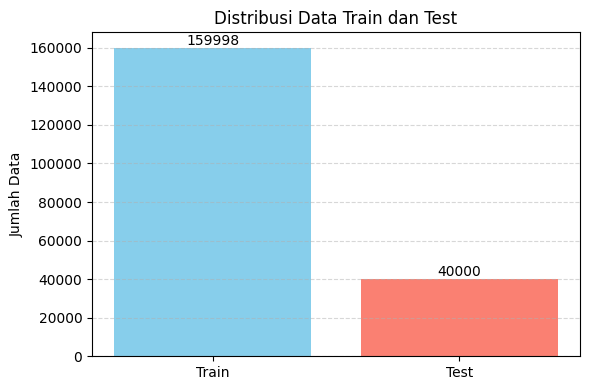

In [26]:
# Hitung jumlah data
train_len = len(y_train)
test_len = len(y_test)

# Label dan jumlah
data_split = [train_len, test_len]
labels = ['Train', 'Test']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, data_split, color=['skyblue', 'salmon'])
plt.title('Distribusi Data Train dan Test')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan jumlah di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
# Reshape data untuk BI-LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Cek bentuk data setelah konversi
print(f'Bentuk y_train_cat: {y_train_cat.shape}')
print(f'Bentuk y_test_cat: {y_test_cat.shape}')

Bentuk y_train_cat: (159998, 3)
Bentuk y_test_cat: (40000, 3)


# **Modeling**

# **RNN**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Model RNN
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 128)         │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,843 (921.26 KB)

 Trainable params: 235,843 (921.26 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [39]:
# Training model
history = model_rnn.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8777 - loss: 0.3368 - val_accuracy: 0.9424 - val_loss: 0.1778
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.9493 - loss: 0.1722 - val_accuracy: 0.9433 - val_loss: 0.1687
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9553 - loss: 0.1577 - val_accuracy: 0.9589 - val_loss: 0.1397
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9568 - loss: 0.1521 - val_accuracy: 0.9615 - val_loss: 0.1374
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9601 - loss: 0.1446 - val_accuracy: 0.9624 - val_loss: 0.1372
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - accuracy: 0.9615 - loss: 0.1392 - val_accuracy: 0.9629 - val_loss: 0.1337
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.9632 - loss: 0.1359 - val_accuracy: 0.9628 - val_loss: 0.1350
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9642 - loss: 

In [46]:
# Evaluasi model
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9634


In [47]:
# Evaluasi model
train_loss, train_accuracy = model_rnn.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9690
Testing Accuracy: 0.9634
Training Loss: 0.1150
Testing Loss: 0.1376


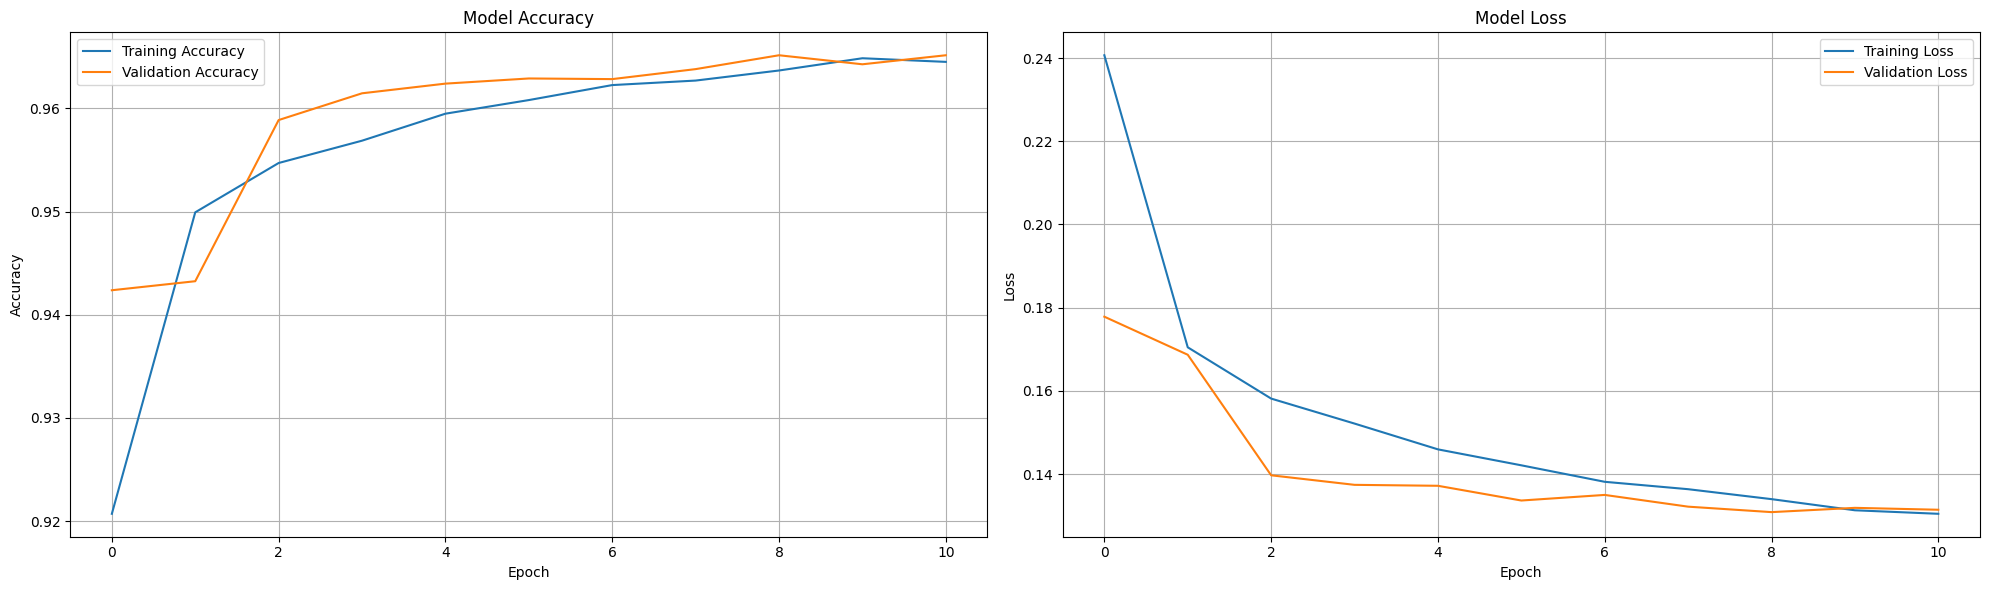

In [48]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


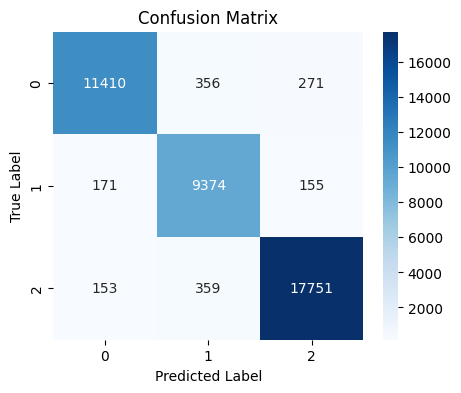

In [49]:
# Prediksi
y_pred = model_rnn.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96     12037
     Neutral       0.93      0.97      0.95      9700
    Positive       0.98      0.97      0.97     18263

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


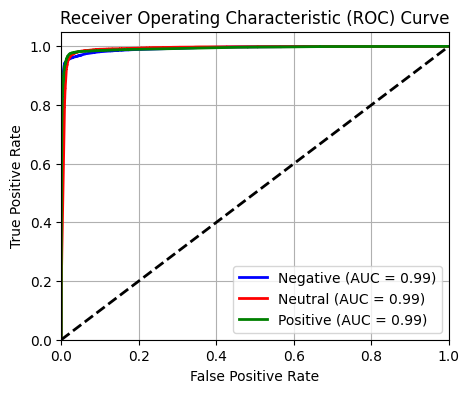


AUC Scores:
Negative: 0.9926
Neutral: 0.9917
Positive: 0.9933


In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_rnn.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **LSTM**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Model LSTM
model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       885,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 936,835 (3.57 MB)

 Trainable params: 936,835 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [31]:
# Training model
history = model_lstm.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 76s 18ms/step - accuracy: 0.8703 - loss: 0.3524 - val_accuracy: 0.9540 - val_loss: 0.1539
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 81s 18ms/step - accuracy: 0.9510 - loss: 0.1649 - val_accuracy: 0.9578 - val_loss: 0.1421
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 72s 18ms/step - accuracy: 0.9572 - loss: 0.1481 - val_accuracy: 0.9573 - val_loss: 0.1423
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.9599 - loss: 0.1410 - val_accuracy: 0.9582 - val_loss: 0.1413
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 79s 18ms/step - accuracy: 0.9622 - loss: 0.1346 - val_accuracy: 0.9632 - val_loss: 0.1331
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 85s 18ms/step - accuracy: 0.9637 - loss: 0.1296 - val_accuracy: 0.9619 - val_loss: 0.1369
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 84s 19ms/step - accuracy: 0.9653 - loss: 0.1256 - val_accuracy: 0.9610 - val_loss: 0.1413
Epoch 7: early stopping
Restoring model weights from the end of the best epo

In [32]:
# Evaluasi model
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9616


In [33]:
# Evaluasi model
train_loss, train_accuracy = model_lstm.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9676
Testing Accuracy: 0.9616
Training Loss: 0.1200
Testing Loss: 0.1401


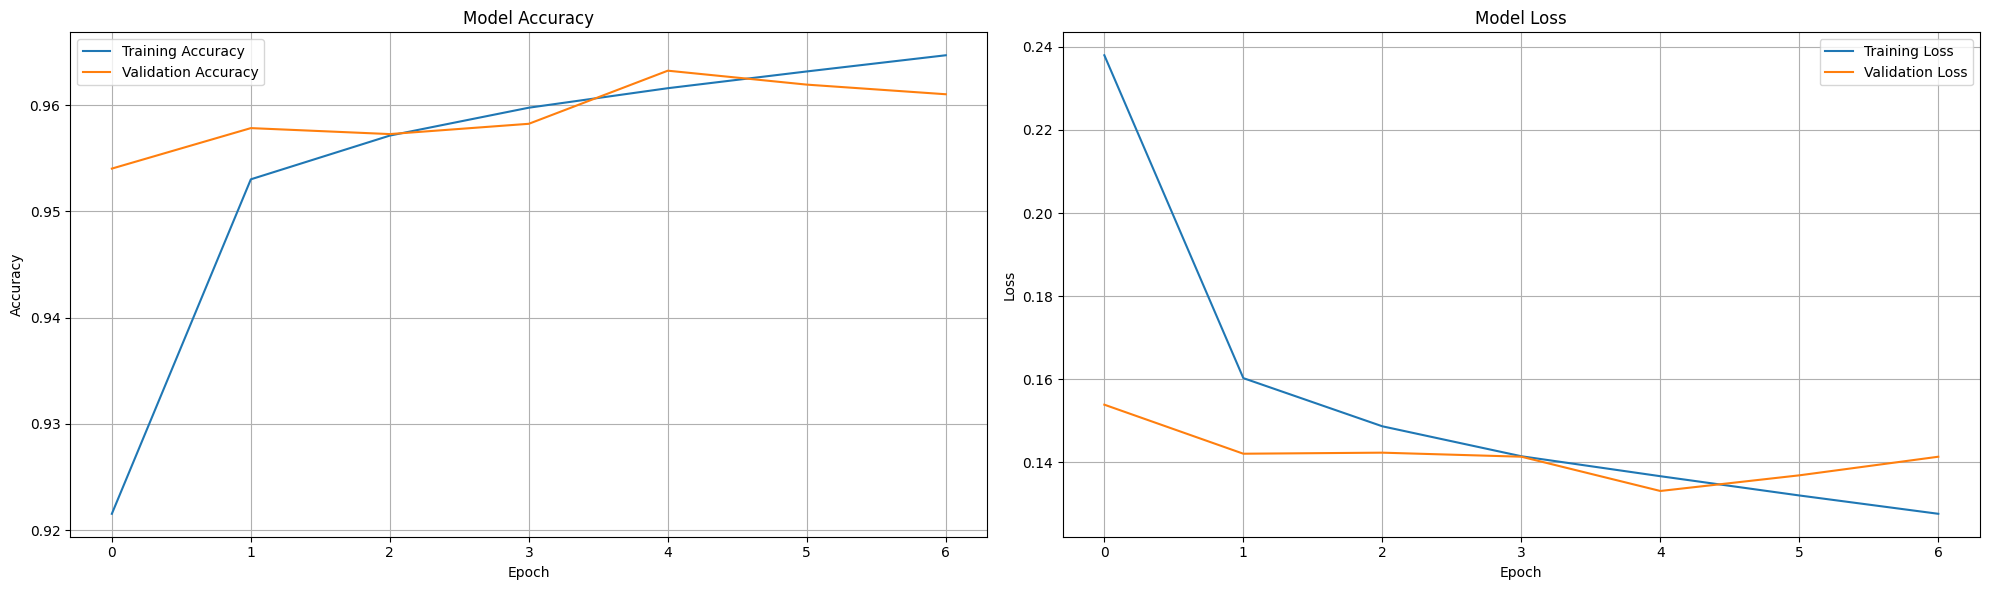

In [34]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


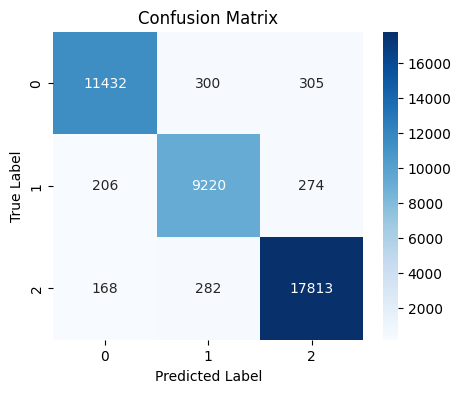

In [35]:
# Prediksi
y_pred = model_lstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [36]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96     12037
     Neutral       0.94      0.95      0.95      9700
    Positive       0.97      0.98      0.97     18263

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


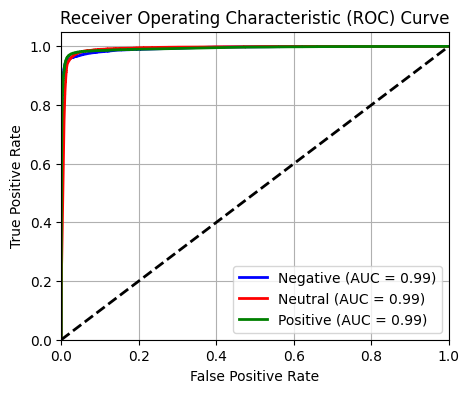


AUC Scores:
Negative: 0.9927
Neutral: 0.9917
Positive: 0.9933


In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_lstm.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Bi-LSTM**

In [28]:
# Model BiLSTM
model_BiLSTM = Sequential([
    Bidirectional(LSTM(128, return_sequences=True),
                 input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Tampilkan ringkasan model
model_BiLSTM.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │     1,770,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,939,075 (7.40 MB)

 Trainable params: 1,939,075 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_BiLSTM.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [31]:
# Training model
history = model_BiLSTM.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 123s 29ms/step - accuracy: 0.8765 - loss: 0.3357 - val_accuracy: 0.9548 - val_loss: 0.1516
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 144s 29ms/step - accuracy: 0.9521 - loss: 0.1620 - val_accuracy: 0.9583 - val_loss: 0.1420
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 120s 30ms/step - accuracy: 0.9571 - loss: 0.1497 - val_accuracy: 0.9589 - val_loss: 0.1409
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 0.9601 - loss: 0.1382 - val_accuracy: 0.9628 - val_loss: 0.1325
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 144s 30ms/step - accuracy: 0.9636 - loss: 0.1307 - val_accuracy: 0.9591 - val_loss: 0.1408
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 137s 29ms/step - accuracy: 0.9636 - loss: 0.1309 - val_accuracy: 0.9617 - val_loss: 0.1405
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 4.


In [32]:
# Evaluasi model
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9609


In [33]:
# Evaluasi model
train_loss, train_accuracy = model_BiLSTM.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9663
Testing Accuracy: 0.9609
Training Loss: 0.1224
Testing Loss: 0.1403


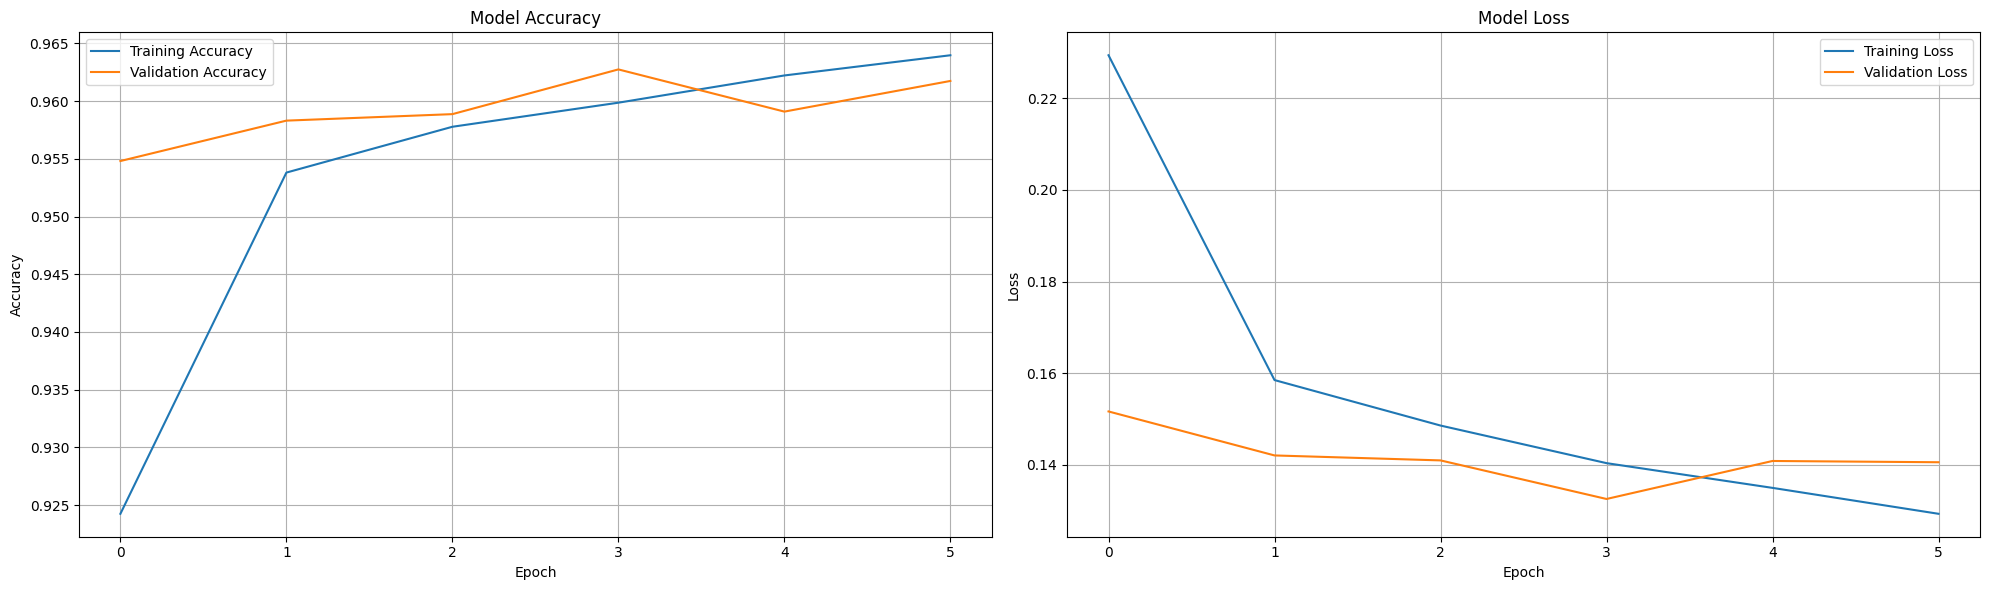

In [34]:
# Buat figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


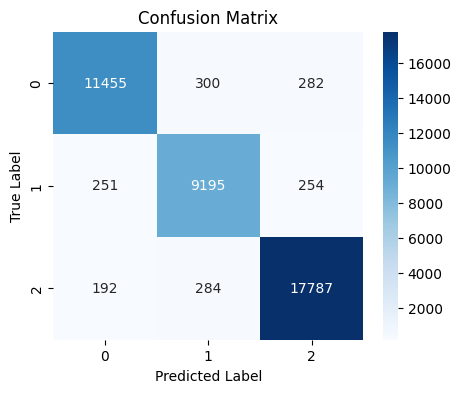

In [35]:
# Prediksi
y_pred = model_BiLSTM.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [36]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96     12037
     Neutral       0.94      0.95      0.94      9700
    Positive       0.97      0.97      0.97     18263

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


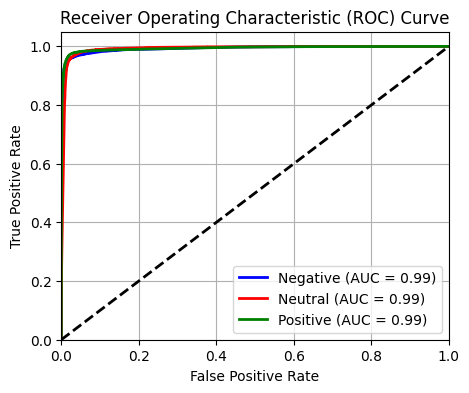


AUC Scores:
Negative: 0.9925
Neutral: 0.9915
Positive: 0.9935


In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_BiLSTM.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Deployment**

# **Visualisasi**

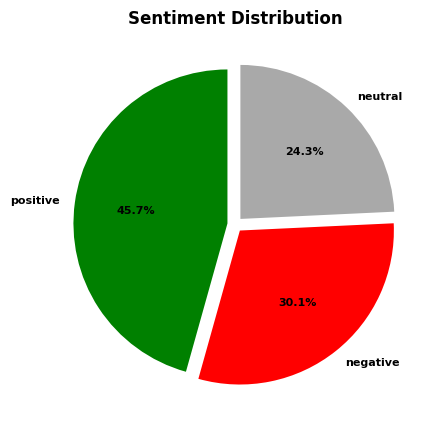

In [38]:
# Data sentiment
sentiment_counts = clean_df['polarity'].value_counts()

# Memberi jarak Chart
explode = [0.05] * len(sentiment_counts)

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#008000', '#FF0000', '#A9A9A9'],
    explode=explode,
    textprops={'fontsize': 8, 'weight': 'bold'}
)
plt.title('Sentiment Distribution', fontsize=12, weight='bold')
plt.show()

<Figure size 1200x600 with 0 Axes>

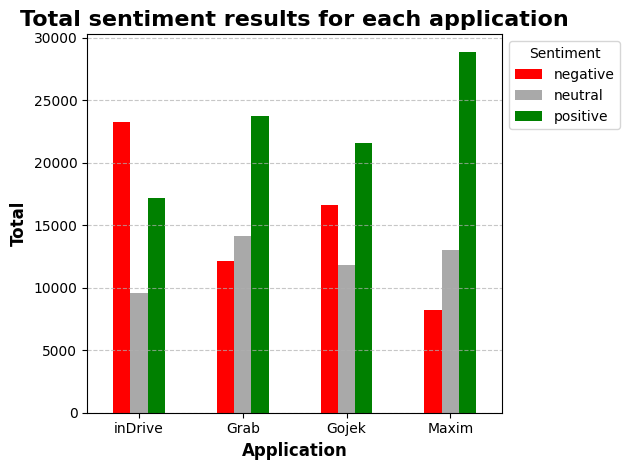

<Figure size 1200x600 with 0 Axes>

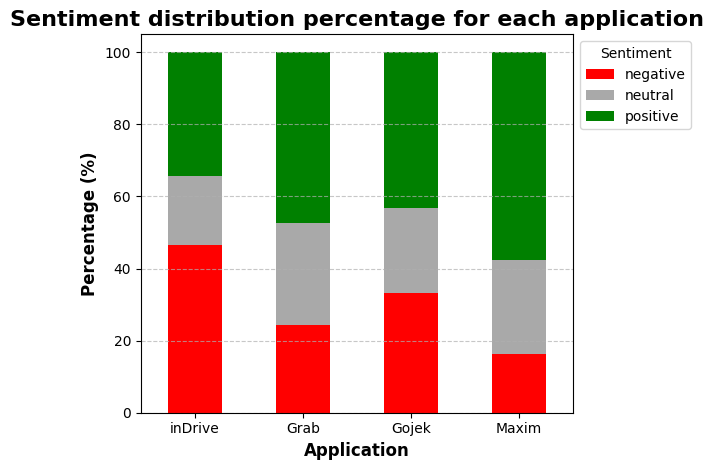

In [39]:
# Data preparation
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']

# Filter and summarize sentiment counts
summary_data = clean_df.groupby(['appName', 'polarity']).size().unstack(fill_value=0).loc[applications]

# Grafik batang: Jumlah absolut sentimen
plt.figure(figsize=(12, 6))
summary_data.plot(kind='bar', stacked=False, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Total sentiment results for each application', fontsize=16, weight='bold')
plt.ylabel('Total', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Grafik batang bertumpuk: Persentase distribusi sentimen
summary_percent = (summary_data.T / summary_data.sum(axis=1)).T * 100

plt.figure(figsize=(12, 6))
summary_percent.plot(kind='bar', stacked=True, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Sentiment distribution percentage for each application', fontsize=16, weight='bold')
plt.ylabel('Percentage (%)', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
# Tabel ringkasan
summary_data['Total'] = summary_data.sum(axis=1)
summary_percent['Positive (%)'] = summary_percent['positive']
summary_percent['Neutral (%)'] = summary_percent['neutral']
summary_percent['Negative (%)'] = summary_percent['negative']

summary_table = pd.concat([summary_data, summary_percent[['Positive (%)', 'Neutral (%)', 'Negative (%)']]], axis=1)
print(summary_table)

polarity  negative  neutral  positive  Total  Positive (%)  Neutral (%)  \
appName                                                                   
inDrive      23227     9571     17201  49999     34.402688    19.142383   
Grab         12159    14118     23723  50000     47.446000    28.236000   
Gojek        16613    11828     21559  50000     43.118000    23.656000   
Maxim         8187    12983     28829  49999     57.659153    25.966519   

polarity  Negative (%)  
appName                 
inDrive      46.454929  
Grab         24.318000  
Gojek        33.226000  
Maxim        16.374327  


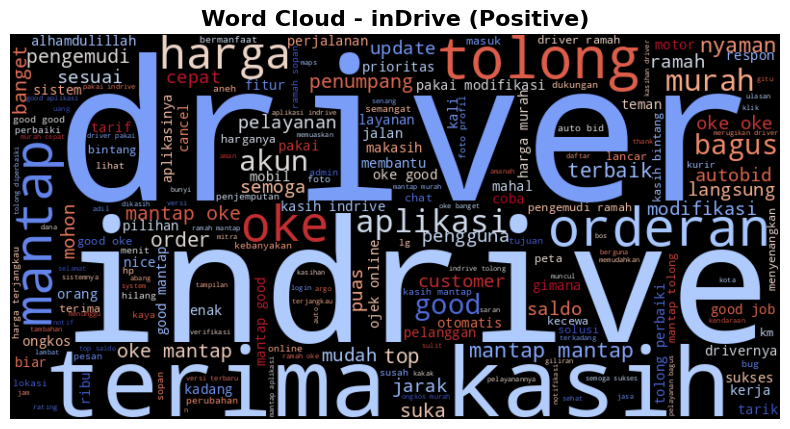

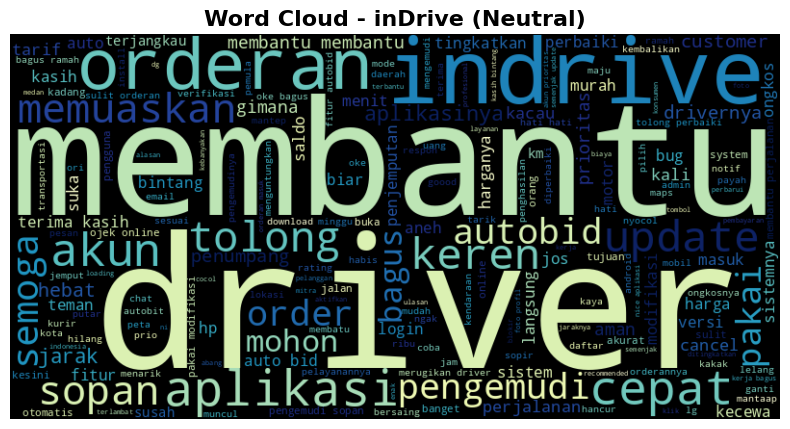

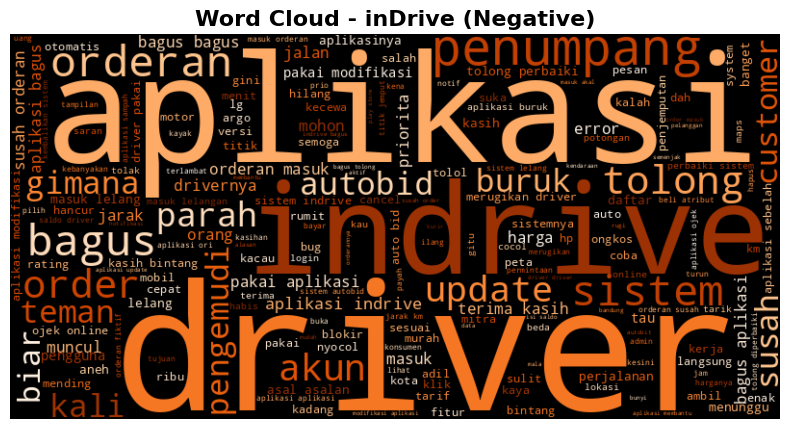

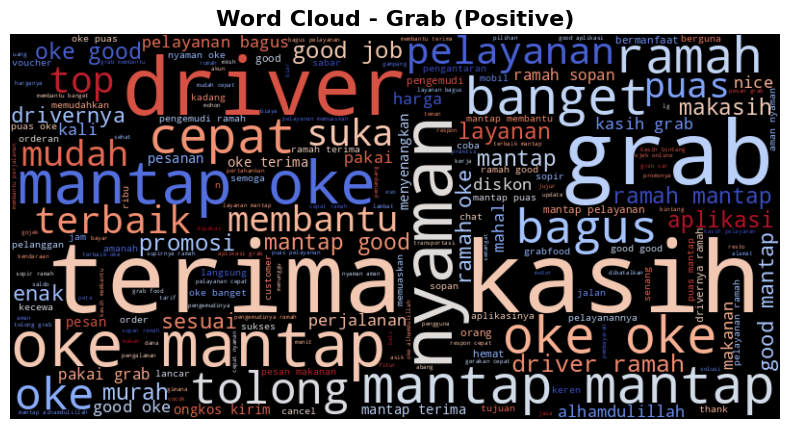

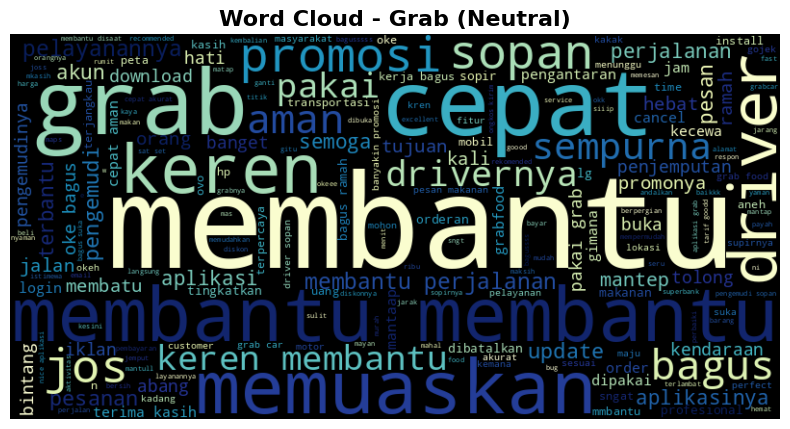

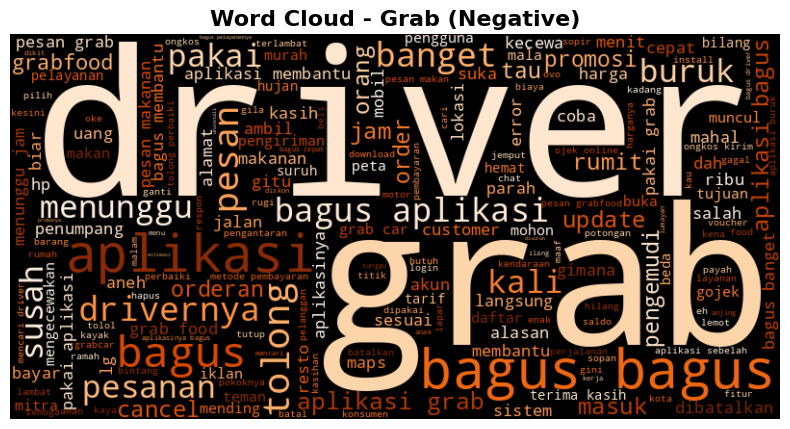

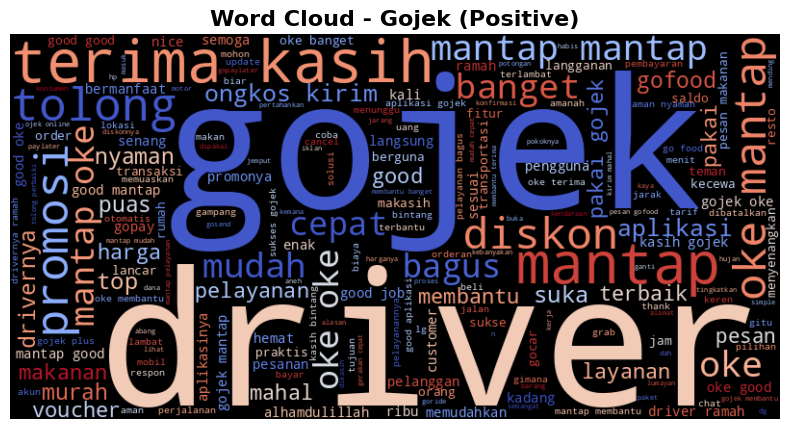

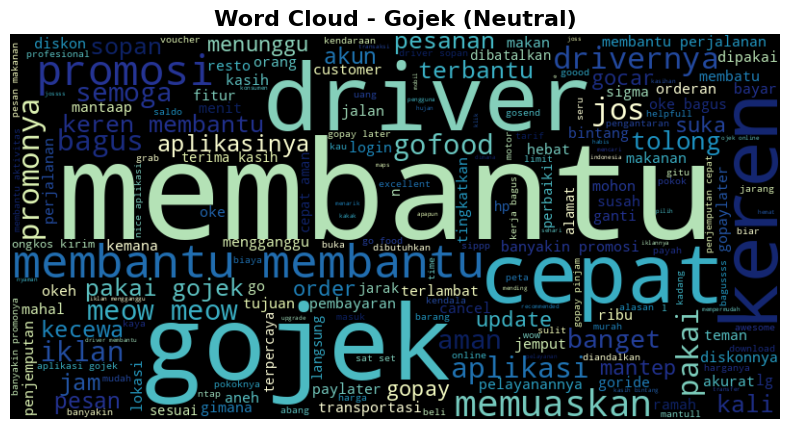

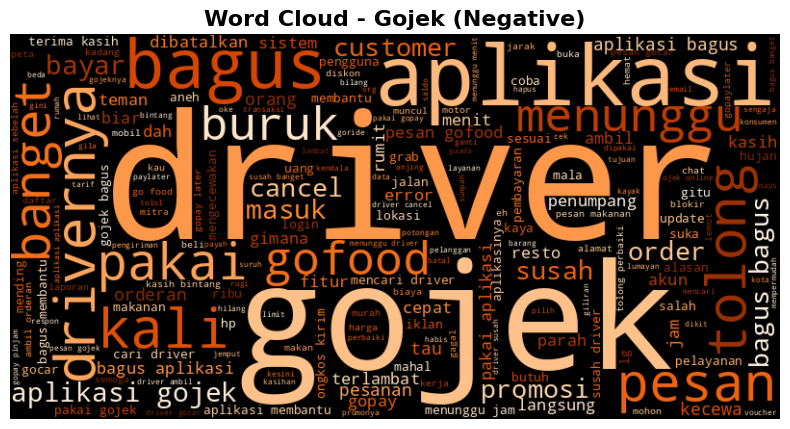

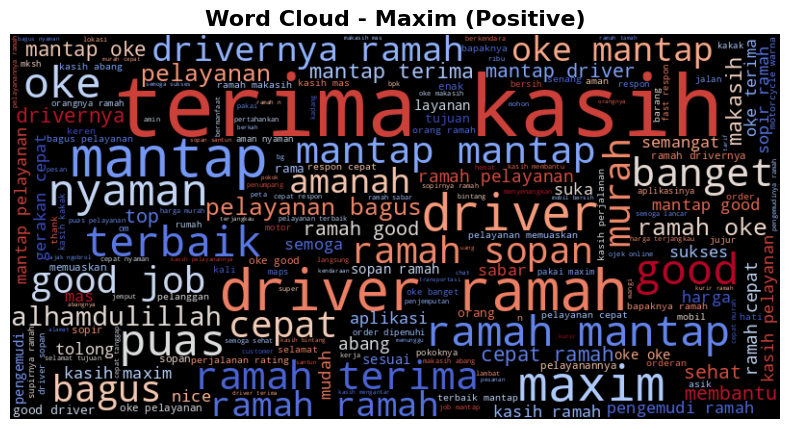

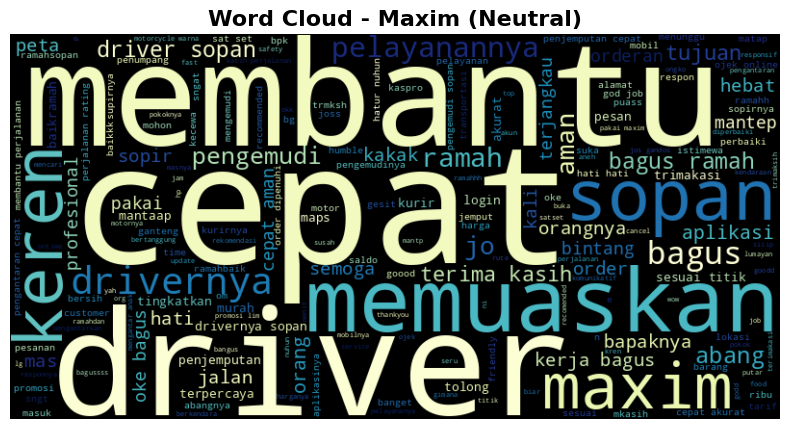

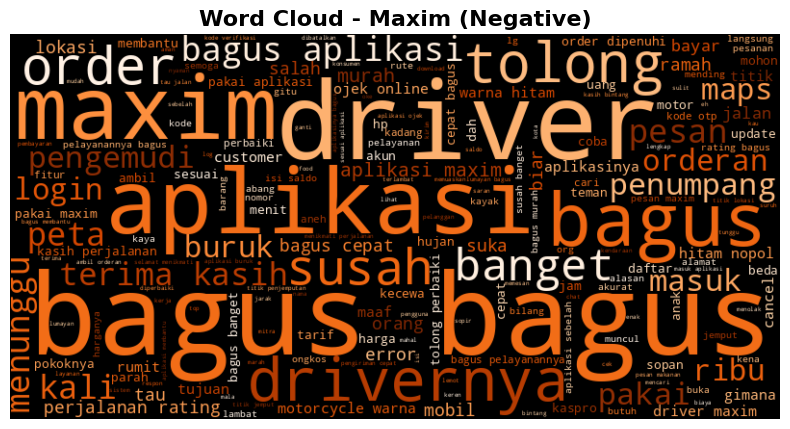

In [41]:
# Visualisasi Word Cloud untuk masing-masing aplikasi dan sentimen
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']
sentiments = ['positive', 'neutral', 'negative']

for app in applications:
    for sentiment in sentiments:
        # Filter data berdasarkan aplikasi dan sentimen
        app_data = clean_df[(clean_df['appName'] == app) & (clean_df['polarity'] == sentiment)]
        text = ' '.join(app_data['text_final'].astype(str))  # Gabungkan semua teks

        # Buat word cloud
        wordcloud = WordCloud(
            background_color='black',
            colormap='coolwarm' if sentiment == 'positive' else 'YlGnBu' if sentiment == 'neutral' else 'Oranges',
            max_words=200,
            width=800,
            height=400
        ).generate(text)

        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - {app} ({sentiment.capitalize()})', fontsize=16, weight='bold')
        plt.show()